# Linear Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np

print(f"torch version: {torch.__version__}, numpy version: {numpy.__version__}"

X = np.array([[2, 2], [4, 7], [7, 8], [11, 21]])
Y = np.array([9, 17, 26, 42])

# append bias term 1 left-most column to form X as 
# [ [1, x1, x2], [1, x1, x2], ...]
ones = np.ones((X.shape[0], 1))
X_aug = np.concatenate([ones, X], axis=1)
## Alternatively, in pytorch, we can use:
# ones = torch.ones(X_tensor.shape[0], 1)
# X_aug = torch.cat([ones, X_tensor], dim=1)
print(X_aug)

# Form Y as 2D with shape [n,1]
Y_aug = np.expand_dims(Y, axis=1) # For Pytorch tensor, use Y.unsqueeze(1)
print(Y_aug)


# Function for plot the predicted graph
import matplotlib.pyplot as plt 
def plot_pred(W_hat, X, Y): 
    # Plot the data and the linear regression line
    # y_pred = model(X_aug).detach().numpy()
    ones = np.ones((X.shape[0], 1))
    X_aug = np.concatenate([ones, X], axis=1)
    Y_aug = np.expand_dims(Y, axis=1) # For Pytorch tensor, use Y.unsqueeze(1)
    Y_pred = X_aug@W_hat
    num_plot = X.shape[1]
    fig, axes = plt.subplots(num_plot,1)
    for i in range(num_plot):
        axes[i].scatter(X[:,i], np.squeeze(Y), color='blue') # real number
        axes[i].plot(X[:,i], np.squeeze(Y_pred), 'o--', color='red') # predicted value
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('y')
        axes[i].set_title(f'Linear Regression (X dim {i})')
    plt.tight_layout()
    plt.show()

[[ 1.  2.  2.]
 [ 1.  4.  7.]
 [ 1.  7.  8.]
 [ 1. 11. 21.]]
[[ 9]
 [17]
 [26]
 [42]]


## 1. Math Solution

Predicted W is [[2.63060179]
 [2.95518566]
 [0.33034571]]


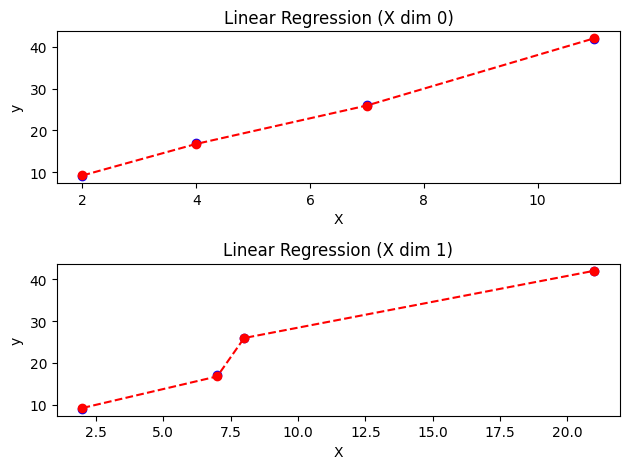

In [2]:
# X shape (B, 1+N), where N is the number of feature x1, x2, ... xN; B is the num of data sample.
# W shape (1+N, 1)
# Y shape (B, 1)

# y_hat = X@W

# Based on normal equation: W_hat = (X'@X)^-1 @ X' @Y
W_hat = np.linalg.inv(X_aug.T@X_aug) @ X_aug.T @ Y_aug
print(f"Predicted W is {W_hat}")
plot_pred(W_hat, X, Y)

## 2. Gradiant Decent
Write the gradient decent by ourself
For Y=X@W, 
grad(RMSE)/grad(y_pred)=-2(y-y_pred)*y_pred
grad(y_pred)/grad(W)=X'

iter = 0, MSE = 508.4325953728573
iter = 100, MSE = 28.610578431592675
iter = 200, MSE = 17.374492711061986
iter = 300, MSE = 10.699210435518776
iter = 400, MSE = 6.811284531333713
iter = 500, MSE = 4.568487360613381
iter = 600, MSE = 3.274028147347711
iter = 700, MSE = 2.5183924352957003
iter = 800, MSE = 2.066834326965543
iter = 900, MSE = 1.7868869293034677
Predicted W is [[1.29459313]
 [3.22081377]
 [0.25937113]]


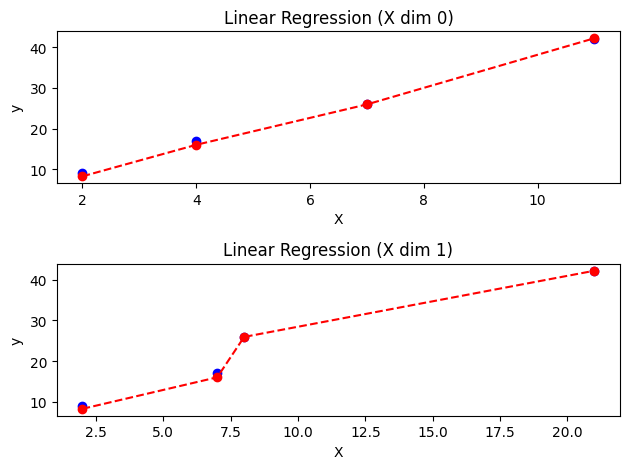

In [8]:
num_iter = 1000
lr = 0.00001
np.random.seed(42)
W_hat = np.random.rand(X_aug.shape[1], 1)
for iter in range(num_iter):
    Y_hat = X_aug @ W_hat
    MSE = np.sum((Y_hat-Y_aug)**2)
    if iter%(num_iter/10)==0:
        print(f"iter = {iter}, MSE = {MSE}")
    grad_1 = np.multiply(-2*(Y_aug-Y_hat), Y_hat) # grad(RMSE)/grad(y_pred), shape (B, 1)
    grad_2 = np.einsum("BN,FB->FB", grad_1, X_aug.T)
    grad_accum = np.einsum("FB->F", grad_2) # accumulate gradiant for each W
    W_hat = W_hat - np.expand_dims(grad_accum, axis=1)*lr
print(f"Predicted W is {W_hat}")
plot_pred(W_hat, X, Y)

## 3. Gradiant Decent (with torch)
Use Pytorch's auto grad computation.

In [4]:
class LinearRegression(nn.Module):
    def __init__(self, n):
        super().__init__()
        self.W = nn.Parameter(torch.rand(n,1))

    def forward(self, X):
        return X@self.W

step = 0, loss = 221.49026489257812
step = 50, loss = 12.15265941619873
step = 100, loss = 8.937626838684082
step = 150, loss = 6.5961432456970215
step = 200, loss = 4.890166282653809
step = 250, loss = 3.646519184112549
step = 300, loss = 2.7392473220825195
step = 350, loss = 2.0767385959625244
step = 400, loss = 1.5923452377319336
step = 450, loss = 1.2375879287719727
Predicted W is [[1.1853004 ]
 [2.841263  ]
 [0.49734107]]


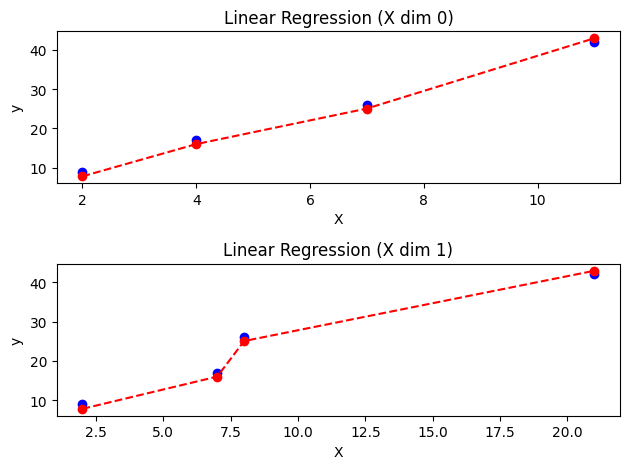

In [10]:
X_tensor = torch.from_numpy(X_aug).float()
Y_tensor = torch.from_numpy(Y_aug).float()

model = LinearRegression(X_aug.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
max_step = 500
mse_loss = nn.MSELoss() # optional: use l2 loss from pytorch builtin
for step in range(max_step):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = mse_loss(output, Y_tensor)
    ## or compute MSE by ourself:
    # loss = torch.sum((Y_tensor - output)**2) # l2 loss
    loss.backward()
    optimizer.step()
    if step%(max_step//10)==0: # print 10 loss data in total
        print(f"step = {step}, loss = {loss}")
W_hat = model.W.detach().numpy()
print(f"Predicted W is {W_hat}")
plot_pred(W_hat, X, Y)